In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from ipywidgets import widgets
from IPython.display import display
import pymc as pm

In [2]:
sub = '01'
final = pd.read_csv(f'HRD/preprocessed/sub-{sub}/filtered.txt')

Index(['TrialType', 'Condition', 'Modality', 'StairCond', 'Decision',
       'DecisionRT', 'Confidence', 'ConfidenceRT', 'Alpha', 'listenBPM',
       'responseBPM', 'ResponseCorrect', 'DecisionProvided', 'RatingProvided',
       'nTrials', 'EstimatedThreshold', 'EstimatedSlope', 'StartListening',
       'StartDecision', 'ResponseMade', 'RatingStart', 'RatingEnds',
       'endTrigger', 'HeartRateOutlier'],
      dtype='object')

## Merging Data

In [3]:
# Directory containing sub-folders
base_dir = '/home/xavfunk/repos/bp_bodily_self/HRD/preprocessed'

# List to store data frames
dfs = []

# Loop through each sub-folder
for subdir in os.listdir(base_dir):
    sub_path = os.path.join(base_dir, subdir)
    if os.path.isdir(sub_path):
        file_path = os.path.join(sub_path, 'filtered.txt')
        # Load data into DataFrame and append to list
        if os.path.exists(file_path):
            sub = file_path.split('/')[-2]
            df = pd.read_csv(file_path)  # Assuming filtered.txt is a CSV file, adjust if it's different
            df['Subject'] = [sub] * len(df)
            dfs.append(df)

# Concatenate all DataFrames
psychophysics_df = pd.concat(dfs, ignore_index=True)

# Output the concatenated DataFrame
# print(result.head())
# save
psychophysics_df.to_csv('all_participants_filtered.csv', index = False)

In [4]:
# load 
psychophysics_df = pd.read_csv('all_participants_filtered.csv')
psychophysics_df

,TrialType,Condition,Modality,StairCond,Decision,DecisionRT,Confidence,ConfidenceRT,Alpha,listenBPM,...,EstimatedThreshold,EstimatedSlope,StartListening,StartDecision,ResponseMade,RatingStart,RatingEnds,endTrigger,HeartRateOutlier,Subject
0,psi,Less,Intero,psi,More,2.455061,78.0,1.129242,-0.5,79.5,...,-23.245423,12.550553,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,True,sub-58
1,CatchTrial,Less,Intero,CatchTrial,Less,1.988851,88.0,0.729683,-30.0,79.0,...,NaN,NaN,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,False,sub-58
2,psi,Less,Intero,psi,Less,2.435296,82.0,1.363725,-23.5,79.0,...,-10.897010,12.875481,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,False,sub-58
3,psi,Less,Intero,psi,More,2.773426,76.0,1.051452,-11.5,77.0,...,-19.828002,12.706017,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,False,sub-58
4,psi,Less,Intero,psi,Less,3.190776,52.0,1.119249,-19.5,76.5,...,-14.135330,11.927329,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,1.711104e+09,False,sub-58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7475,psi,Less,Intero,psi,Less,1.499786,82.0,0.509566,-8.5,87.0,...,5.435930,13.284558,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,False,sub-22
7476,psi,More,Intero,psi,More,1.236418,100.0,0.688694,19.5,92.5,...,5.314437,13.151601,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,False,sub-22
7477,psi,Less,Intero,psi,Less,1.248357,100.0,0.916864,-8.5,82.0,...,5.436811,13.021118,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,False,sub-22
7478,CatchTrial,More,Intero,CatchTrial,Less,2.088914,35.0,0.845204,10.0,83.5,...,NaN,NaN,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,1.710422e+09,False,sub-22


In [5]:
# comparable to LG
np.sum(psychophysics_df.HeartRateOutlier)

1152

In [39]:
this_df = psychophysics_df[['Alpha', 'Decision', 'Subject', 'Modality']]
# throw away subject sub-07
this_df = this_df[(this_df['Subject'] != 'sub-07') & (this_df['Subject'] != 'sub-63')]
len(this_df.Subject.unique())

69

In [40]:
## A widget to scroll through the participant-level answers

# to store intensities, responses and totals
result = {'intensities':[], 'responses':[], 'totals':[]}

# loop over all subjects
for i, sub in enumerate(this_df.Subject.unique()):
    
    # subsample the df to get subject answers
    sub_df = this_df[this_df.Subject==sub]
    
    # get unique intensities
    ints_sub = np.sort(sub_df.Alpha.unique())
    # to store sub-level responses and totals
    resps_sub = np.zeros(len(ints_sub))
    totals_sub = np.zeros(len(ints_sub))
    
    # loop over each intensity
    for ii, intensity in enumerate(np.sort(sub_df.Alpha.unique())):
        # collect resp, total
        resp = sum((sub_df.Alpha == intensity) & (sub_df.Decision == 'More'))
        total = sum(sub_df.Alpha == intensity)

        resps_sub[ii] = sum((sub_df.Alpha == intensity) & (sub_df.Decision == 'More'))
        totals_sub[ii] = sum(sub_df.Alpha == intensity)

    result['intensities'].append(ints_sub)
    result['responses'].append(resps_sub)
    result['totals'].append(totals_sub)

# make df from esult dict
result_df = pd.DataFrame(result)

def plot_responses(i):
    
    # plotting code from legrand
    fig, axs = plt.subplots(figsize=(8, 5))
    
    # loop over each intensity    
    for j in range(len(result_df.iloc[i].intensities)):
        
        axs.plot(result_df.iloc[i].intensities[j], result_df.iloc[i].responses[j]/result_df.iloc[i].totals[j],
                 'o', alpha=0.5, color='#4c72b0', markeredgecolor='k', markersize=result_df.iloc[i].totals[j]*5)

    plt.ylabel('P$_{(Response = More|Intensity)}$')
    plt.xlabel('Intensity ($\Delta$ BPM)')
    plt.tight_layout()
    #sns.despine()

widgets.interact(plot_responses, i=(0, 70))

interactive(children=(IntSlider(value=35, description='i', max=70), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_responses(i)>

## Prepare data

In [41]:
nsubj = this_df.Subject.nunique()
x_total, n_total, r_total, sub_total = [], [], [], []
full_n = np.zeros(163)
full_r = np.zeros(163)
sub_key = {} # mapping sub numbers to indeces in analysis

for i, sub in enumerate(sorted(this_df.Subject.unique())):
#     print(i, sub)
    sub_df = this_df[this_df.Subject==sub]

    x, n, r = np.zeros(163), np.zeros(163), np.zeros(163)
    
    for ii, intensity in enumerate(np.arange(-40.5, 41, 0.5)):
        x[ii] = intensity
        n[ii] = sum(sub_df.Alpha == intensity)
        r[ii] = sum((sub_df.Alpha == intensity) & (sub_df.Decision == "More"))
        
    full_n += n
    full_r += r
    
    # remove no responses trials
    validmask = n != 0
    xij, nij, rij = x[validmask], n[validmask], r[validmask]
    sub_vec = [i] * len(xij)

    x_total.extend(xij)
    n_total.extend(nij)
    r_total.extend(rij)
    sub_total.extend(sub_vec)
    sub_key[i] = sub

In [42]:
# sanity checks
print(len(x_total), len(n_total), len(r_total), len(sub_total))
# print(x_total[:240//3], sub_total, cond_total, r_total) # should make sense, eg one pp has all intensities 2 times

2134 2134 2134 2134


## Model

In [43]:
def cumulative_normal(x, alpha, beta):
    # Cumulative distribution function for the standard normal distribution
    return 0.5 + 0.5 * math.erf((x - alpha) / (beta * np.sqrt(2)))

def tlogit(x, L = None):
    if L == None:
        return 1 / (1 + np.exp(-x))
    else:
        return L / (1 + np.exp(-x))

In [44]:
   
# logit
with pm.Model() as hierarchicalPsychophysics:

    mu_alpha = pm.Uniform("mu_alpha", lower=-50, upper=50)
    sigma_alpha = pm.HalfNormal("sigma_alpha", sigma=100)

    mu_beta = pm.Uniform("mu_beta", lower=0, upper=100)
    sigma_beta = pm.HalfNormal("sigma_beta", sigma=100)

    alpha = pm.Normal("alpha", mu=mu_alpha, sigma=sigma_alpha, shape=nsubj)
    beta = pm.Normal("beta", mu=mu_beta, sigma=sigma_beta, shape=nsubj)

    line =  (x_total - alpha[sub_total])  * 1/ beta[sub_total]
    
    thetaij = pm.Deterministic("thetaij", tlogit(line))

    rij_ = pm.Binomial("rij", p=thetaij, n=n_total, observed=r_total)

In [48]:
print(pm.model_to_graphviz(hierarchicalPsychophysics))

digraph {
	sigma_alpha [label="sigma_alpha
~
HalfNormal" shape=ellipse]
	mu_beta [label="mu_beta
~
Uniform" shape=ellipse]
	mu_alpha [label="mu_alpha
~
Uniform" shape=ellipse]
	sigma_beta [label="sigma_beta
~
HalfNormal" shape=ellipse]
	subgraph cluster69 {
		alpha [label="alpha
~
Normal" shape=ellipse]
		beta [label="beta
~
Normal" shape=ellipse]
		label=69 labeljust=r labelloc=b style=rounded
	}
	subgraph cluster2134 {
		thetaij [label="thetaij
~
Deterministic" shape=box]
		rij [label="rij
~
Binomial" shape=ellipse style=filled]
		label=2134 labeljust=r labelloc=b style=rounded
	}
	sigma_alpha -> alpha
	mu_alpha -> alpha
	mu_beta -> beta
	sigma_beta -> beta
	beta -> thetaij
	alpha -> thetaij
	thetaij -> rij
}



In [46]:
with hierarchicalPsychophysics:

    trace = pm.sample(
        chains=4, cores=4, return_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_alpha, sigma_alpha, mu_beta, sigma_beta, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


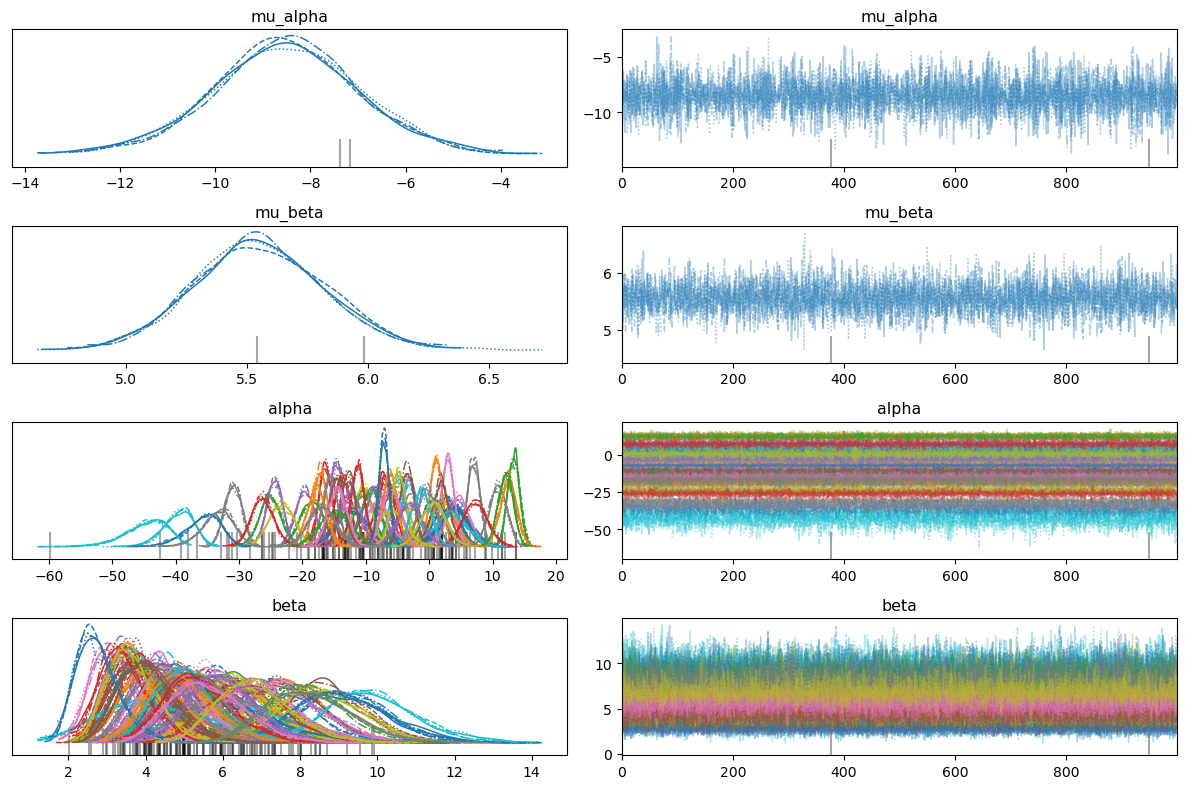

In [47]:
import arviz as az
az.plot_trace(trace, var_names=["mu_alpha", "mu_beta", "alpha", "beta"])
plt.tight_layout()

In [36]:
az.summary(trace, var_names = ["mu_alpha", "mu_beta", "sigma_alpha", "sigma_beta"])#.to_csv("hier_results.csv")

/home/xavfunk/anaconda3/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_alpha,-7.776,1.615,-10.794,-4.777,0.018,0.013,8259.0,3013.0,1.0
mu_beta,5.920,0.344,5.296,6.585,0.005,0.004,4639.0,2970.0,1.0
sigma_alpha,13.867,1.240,11.519,16.069,0.016,0.012,6521.0,2737.0,1.0
sigma_beta,2.532,0.311,2.003,3.133,0.006,0.004,2559.0,2763.0,1.0


In [50]:
summ = az.summary(trace, var_names = ["alpha", "beta"])#.to_csv("hier_results.csv")
summwith pm.Model() as model2:
    y_max = 1
    y_min = 0.5
    
    b = pm.Exponential('b', 2.5)
    x_c = pm.Normal('x_c', mu = 1.5, tau = 40)
    
    linerpredi = np.log(y_max) + 1/b * (x - x_c)
    
    mu_y = pm.Deterministic("mu_y", tlogit(linerpredi, L = y_max))    
    means = prior_psilo.prior['mu_y'].data[0].T[:,i] # picking one sigmoid
    
    # rt as ex-gaussian
    rt_trials = [pm.ExGaussian(f"y_{i}", mu=means[i], sigma = 0.1, nu = 0.1) for i in range(len(means))]


/home/xavfunk/anaconda3/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],4.423,2.163,0.564,8.725,0.024,0.021,8038.0,2998.0,1.0
alpha[1],-3.147,2.145,-7.148,1.017,0.024,0.023,7870.0,2590.0,1.0
alpha[2],13.324,0.975,11.562,15.187,0.012,0.008,6664.0,2567.0,1.0
alpha[3],-16.349,1.066,-18.311,-14.246,0.012,0.008,8063.0,2847.0,1.0
alpha[4],-14.577,0.993,-16.488,-12.780,0.011,0.008,8583.0,3027.0,1.0
...,...,...,...,...,...,...,...,...,...
beta[64],6.036,0.898,4.459,7.797,0.012,0.009,7753.0,2424.0,1.0
beta[65],4.130,0.764,2.711,5.474,0.011,0.009,6170.0,2631.0,1.0
beta[66],5.640,0.988,3.935,7.451,0.013,0.010,6708.0,3146.0,1.0
beta[67],8.255,1.119,6.223,10.293,0.015,0.011,5974.0,2809.0,1.0


In [60]:
summ
sub_vec = []
for idx in summ.index:
    try:
#         print(idx.split('[')[-1].replace(']', ''))
        idx = idx.split('[')[-1].replace(']', '')
        sub_vec.append(sub_key[int(idx)])
    except ValueError:
        sub_vec.append(None)
summ['subject'] = sub_vec

In [62]:
summ

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,subject
alpha[0],4.423,2.163,0.564,8.725,0.024,0.021,8038.0,2998.0,1.0,sub-01
alpha[1],-3.147,2.145,-7.148,1.017,0.024,0.023,7870.0,2590.0,1.0,sub-02
alpha[2],13.324,0.975,11.562,15.187,0.012,0.008,6664.0,2567.0,1.0,sub-03
alpha[3],-16.349,1.066,-18.311,-14.246,0.012,0.008,8063.0,2847.0,1.0,sub-04
alpha[4],-14.577,0.993,-16.488,-12.780,0.011,0.008,8583.0,3027.0,1.0,sub-05
...,...,...,...,...,...,...,...,...,...,...
beta[64],6.036,0.898,4.459,7.797,0.012,0.009,7753.0,2424.0,1.0,sub-68
beta[65],4.130,0.764,2.711,5.474,0.011,0.009,6170.0,2631.0,1.0,sub-69
beta[66],5.640,0.988,3.935,7.451,0.013,0.010,6708.0,3146.0,1.0,sub-70
beta[67],8.255,1.119,6.223,10.293,0.015,0.011,5974.0,2809.0,1.0,sub-71


In [63]:
summ.to_csv("hier_results.csv")